In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df2 = pd.read_csv(r'C:\USFQ\Tesis\Data\raw2.csv')


NameError: name 'pd' is not defined

In [131]:
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [132]:


def stacked_not_defined_comparison(df, columns_to_check):
    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        # Consideramos como "no definidos" si es "Not defined", "No definido" o NaN
        not_defined_count = df[col].isin(["Not defined", "No definido"]).sum() + df[col].isna().sum()
        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    # Pivot con categorías ordenadas correctamente
    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    # Aseguramos columnas en orden y que existan
    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10,6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    # Agregar porcentajes centrados en cada sección de la barra
    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center', fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


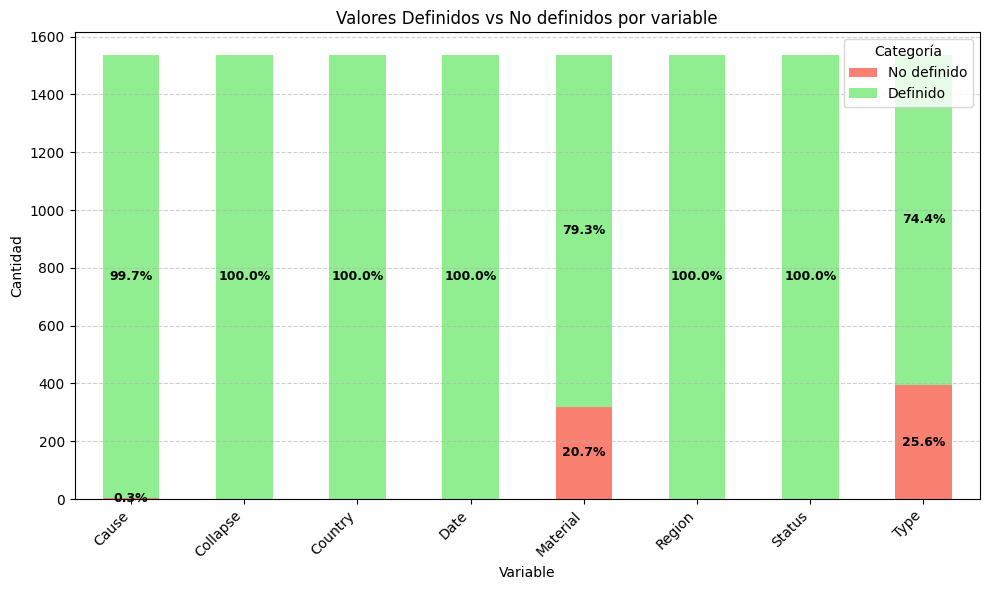

In [133]:
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']
num_cols=['Date']

df2=df2.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'])

df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']
num_cols=['Date']
target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


In [134]:

X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') 
]

X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




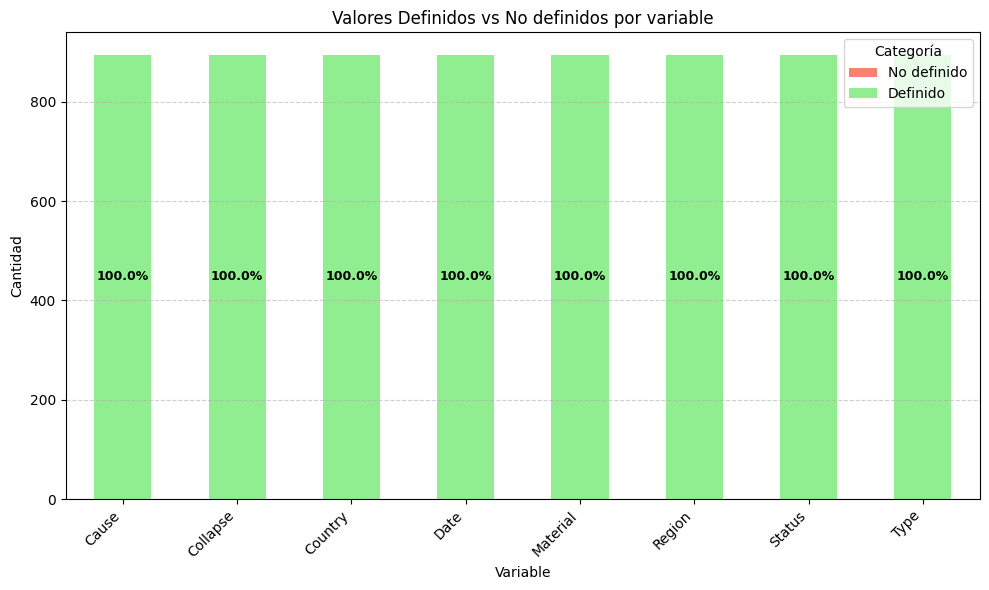

In [135]:
stacked_not_defined_comparison(X, features)

In [136]:

temp_df=X


X = X[
    (X['Cause'] != "Deterioration") &
    (X['Cause'] != "Earthquake") &
    (X['Cause'] != "Terrorism") &
    (X['Cause'] != "Huricane") &
    (X['Cause'] != "Ciclon") 
]
temp_df=X

print("Count de X "+str(X.count()))

Y=X['Cause'].copy()



X=X.drop(columns=['Cause'])


Count de X Type        793
Cause       793
Material    793
Collapse    793
Status      793
Country     793
Region      793
Date        793
dtype: int64


## Analisis Outliers

In [137]:
temp_df

,Type,Cause,Material,Collapse,Status,Country,Region,Date
41,Beam,Collision events,Reinforced concrete,Total,Operational,Germany,Europe,1966.0
43,Truss,Collision events,Steel,Total,Operational,Germany,Europe,2015.0
45,Truss,Collision events,Steel,Partial,Operational,Germany,Europe,1869.0
46,Suspension,Collision events,Wood,Partial,Operational,Germany,Europe,1908.0
48,Beam,Collision events,Reinforced concrete,Total,Operational,Germany,Europe,1979.0
...,...,...,...,...,...,...,...,...
1531,Beam,Overloading,Composite,Partial,Operational,Islas Salomon,Small islands,2025.0
1532,Beam,Overloading,Reinforced concrete,Total,Operational,Jamaica,Small islands,2024.0
1533,Beam,Construction deficiencies,Reinforced concrete,Total,Construction,Jordan,Asia,2003.0
1535,Beam,Flood,Composite,Partial,Operational,Lesotho,Africa,2020.0


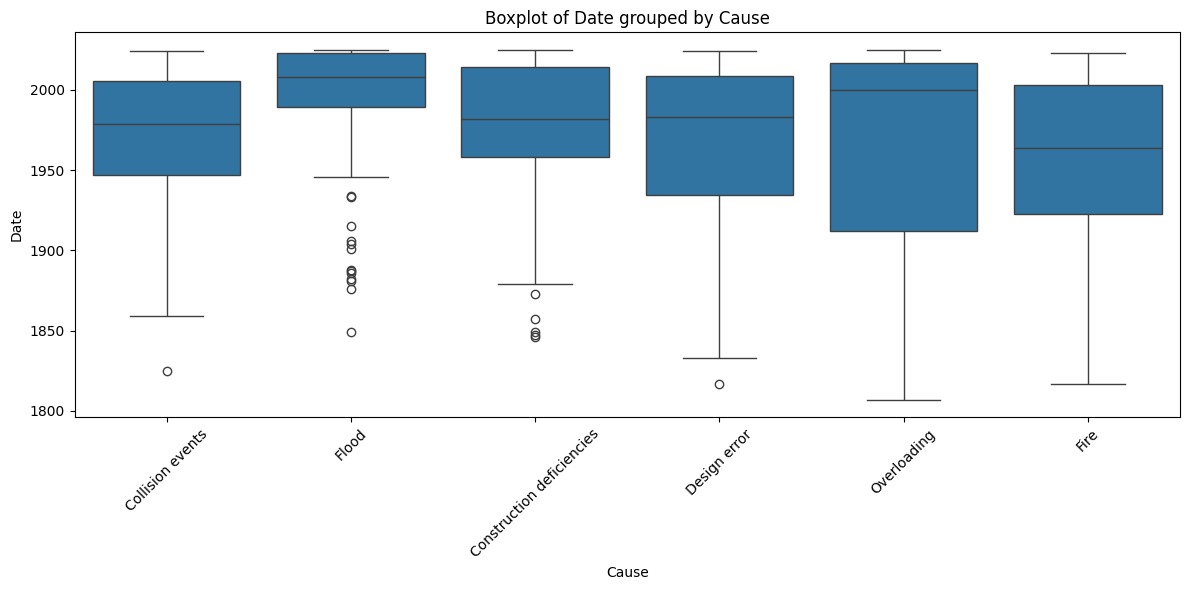

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=temp_df, x='Cause', y='Date')
plt.xticks(rotation=45)
plt.title('Boxplot of Date grouped by Cause')
plt.tight_layout()
plt.show()


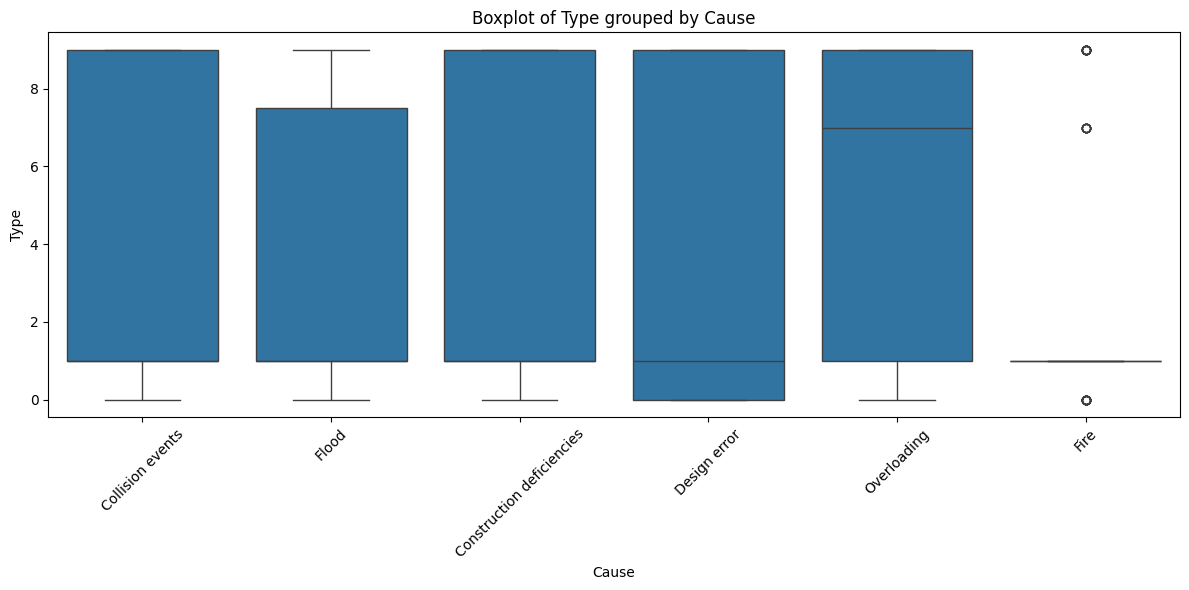

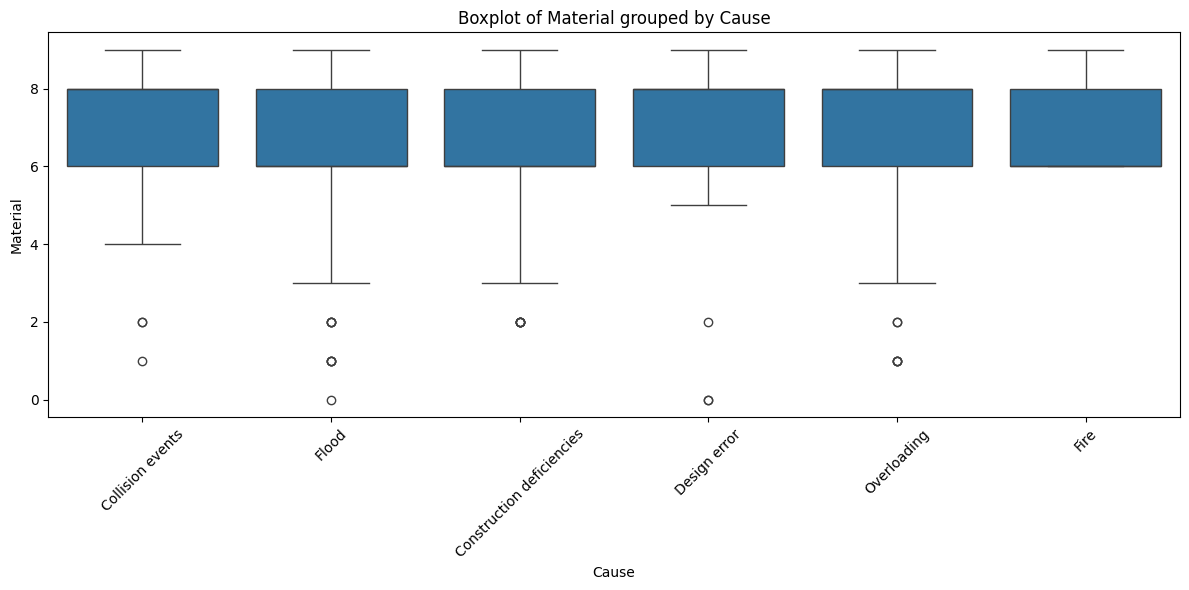

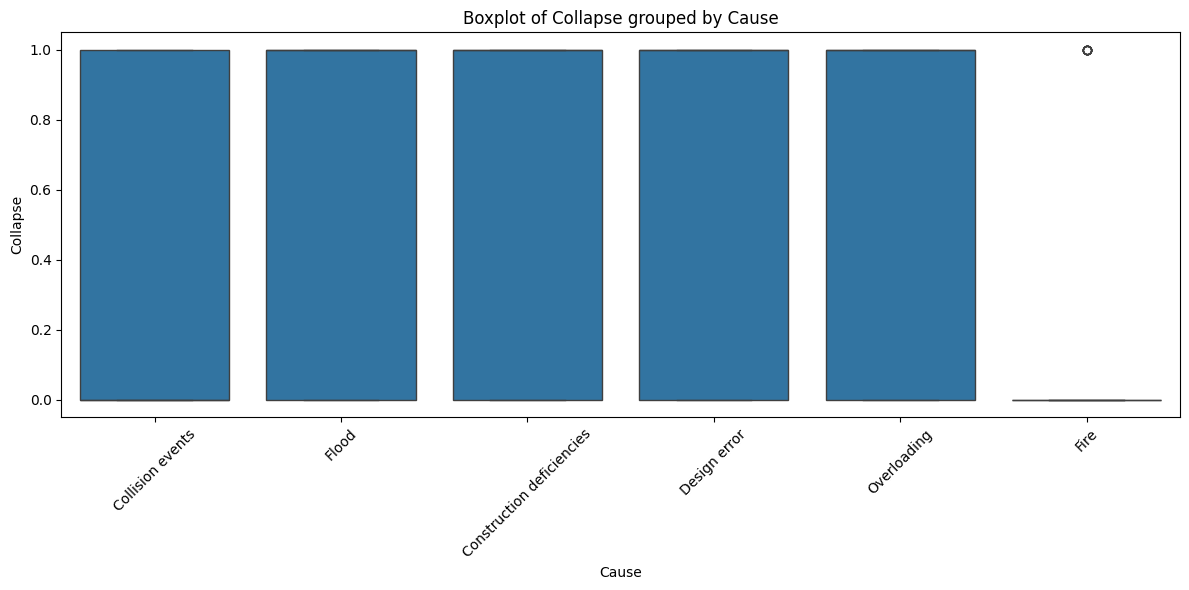

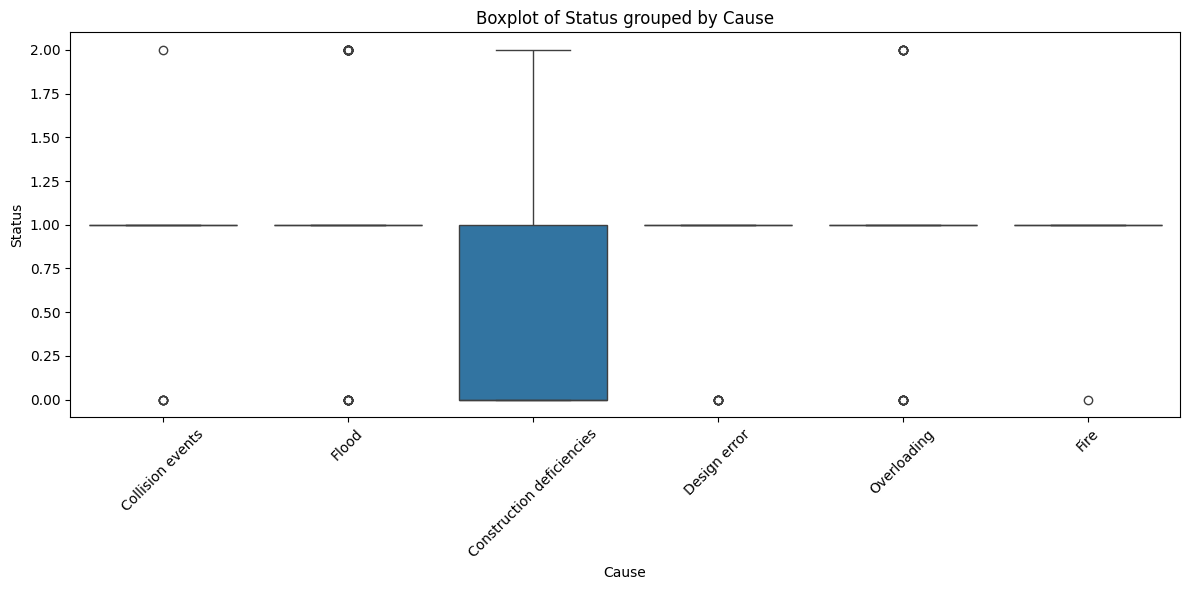

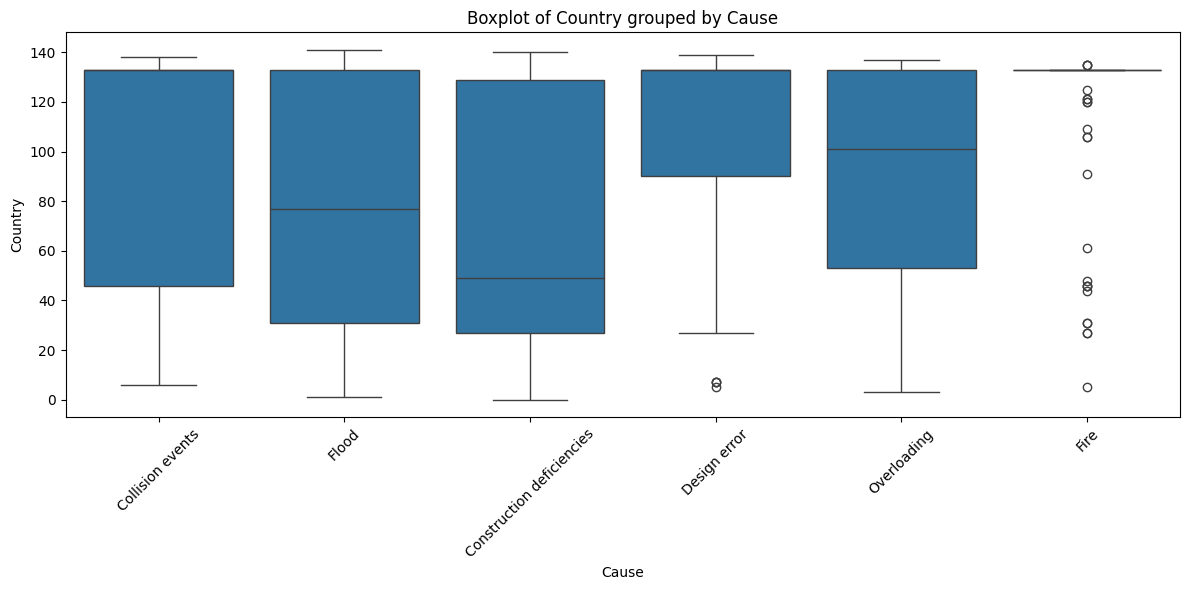

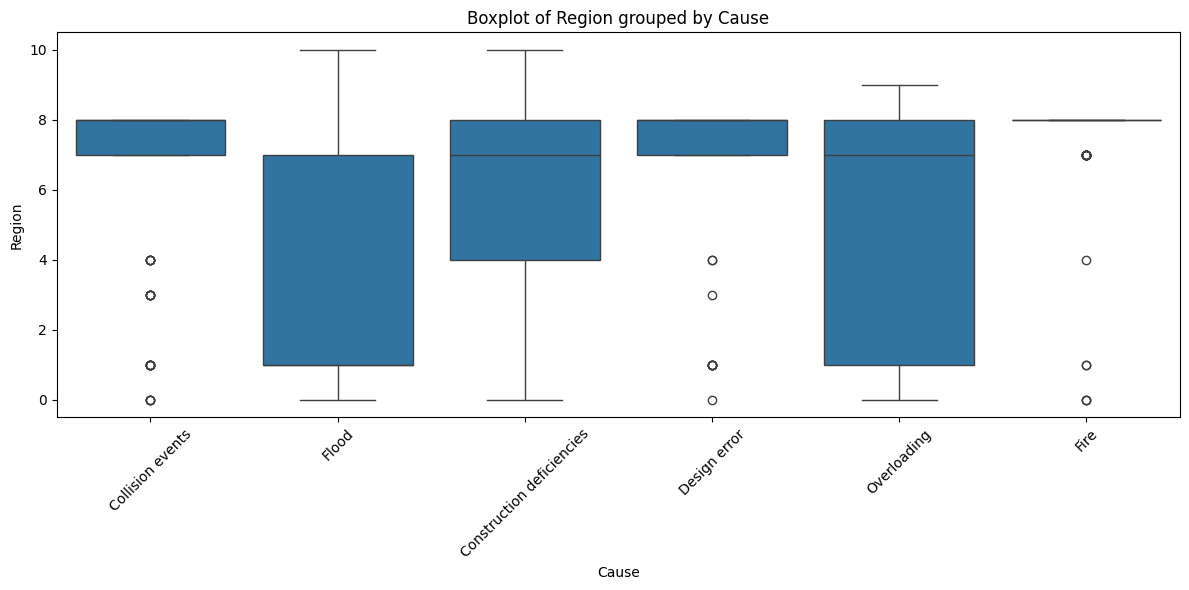

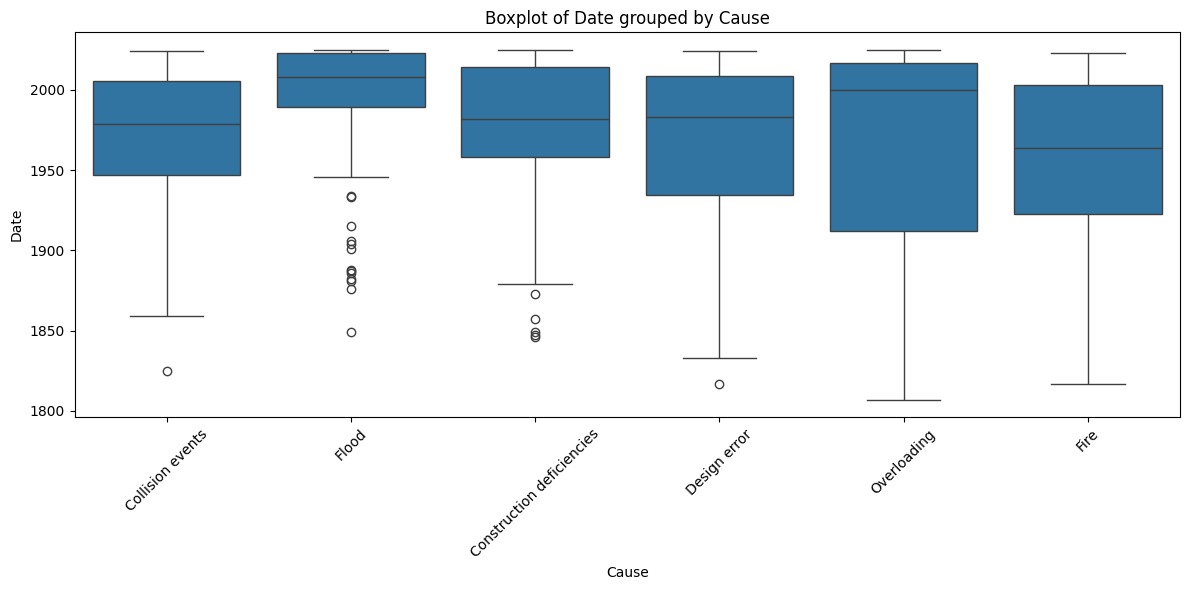

In [139]:
for col in categorical_cols + ['Date']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_encoded, x='Cause', y=col)
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} grouped by Cause')
    plt.tight_layout()
    plt.show()


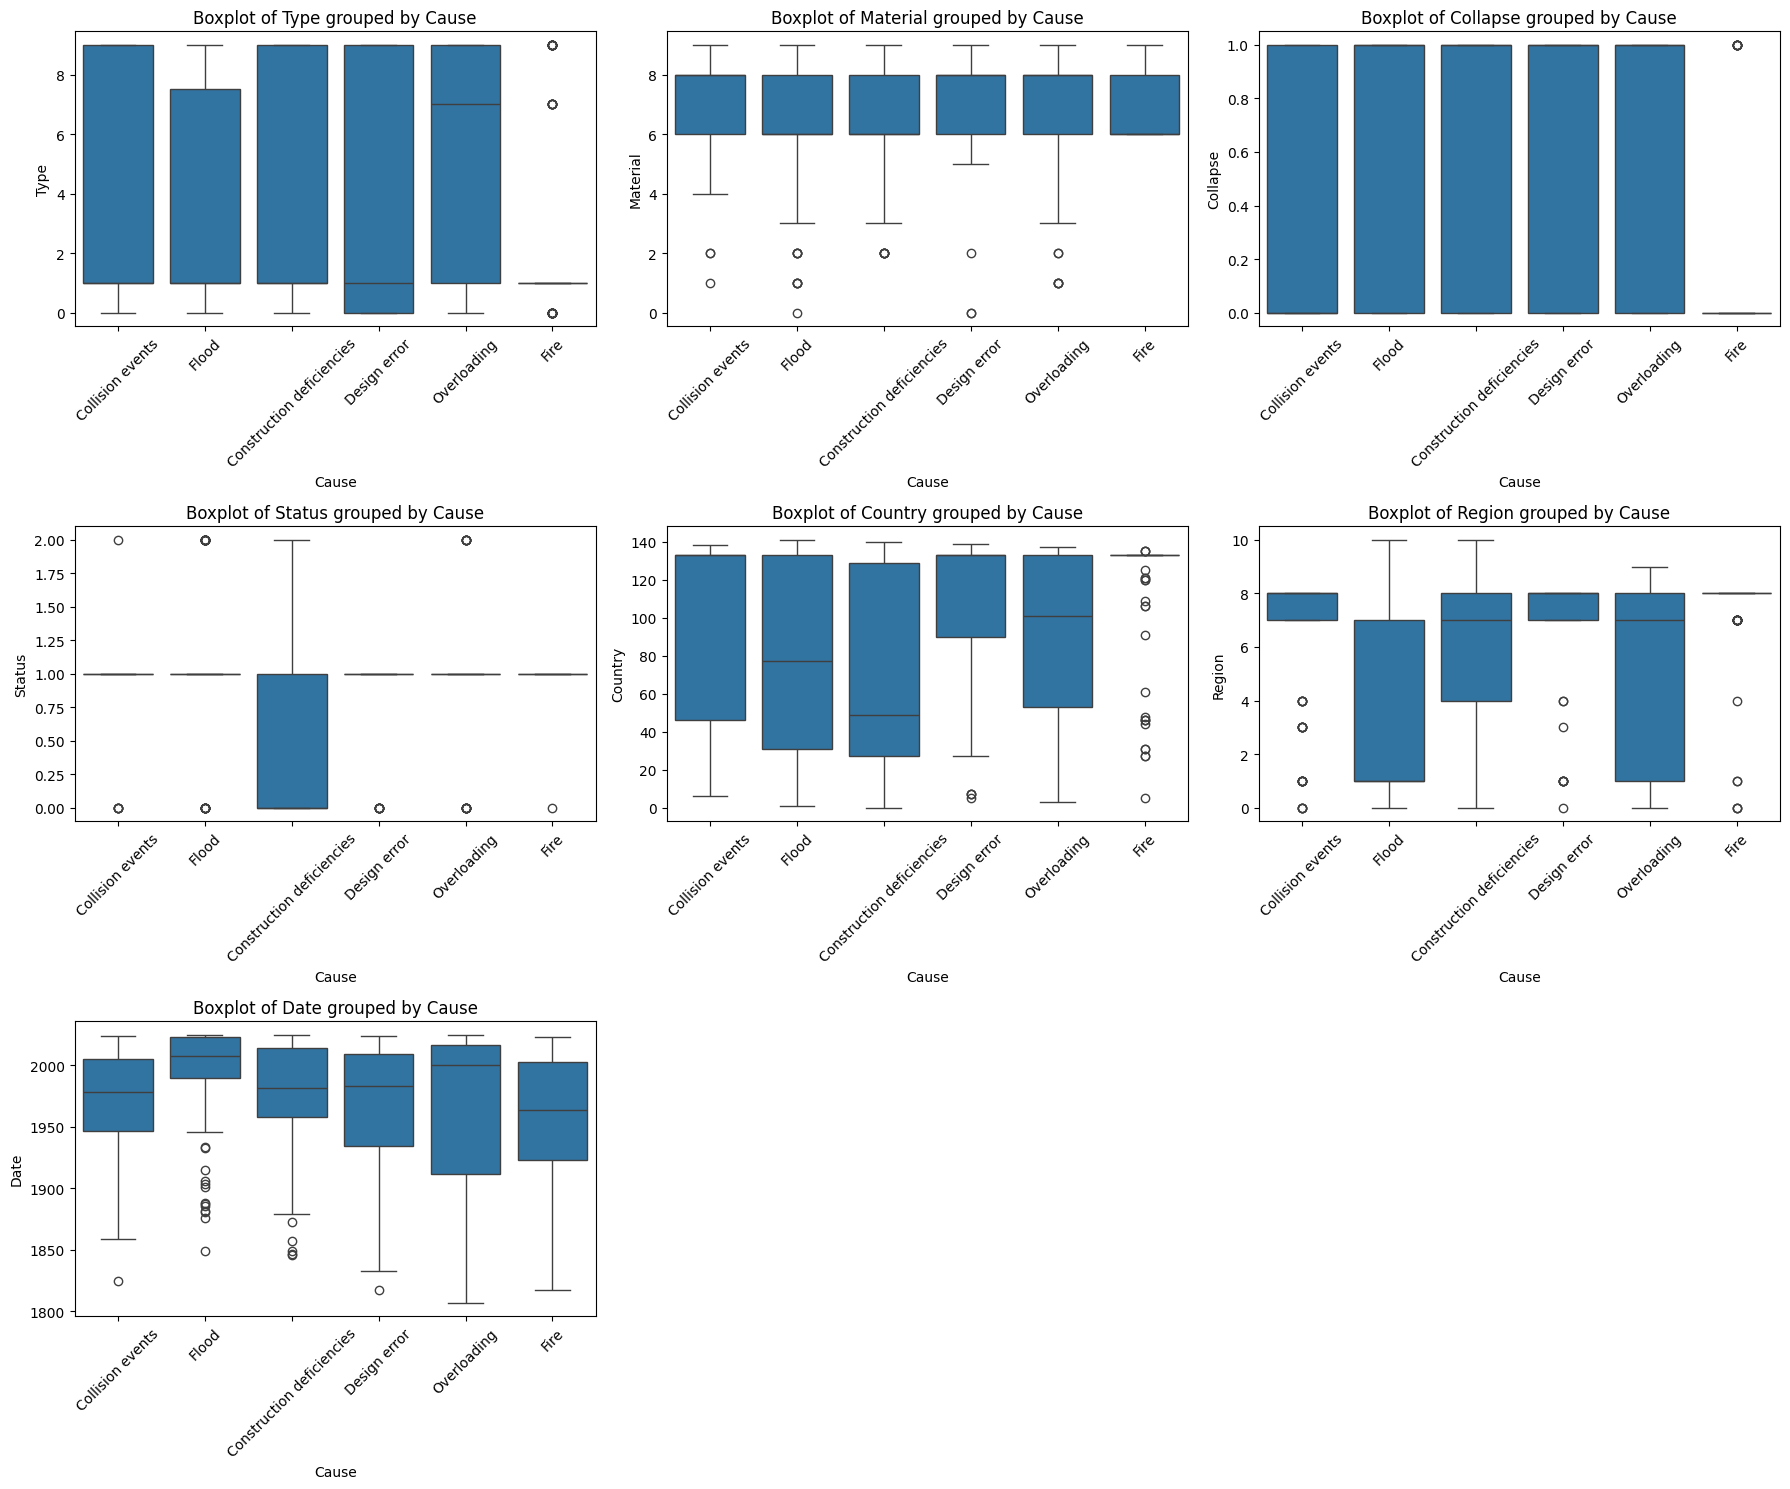

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Copia y codifica las variables categóricas
df_encoded = temp_df.copy()
categorical_cols = ['Type', 'Material', 'Collapse', 'Status', 'Country', 'Region']
encoder = OrdinalEncoder()
df_encoded[categorical_cols] = encoder.fit_transform(temp_df[categorical_cols])

# Agregamos 'Date' que ya es numérica
features = categorical_cols + ['Date']

# Creamos subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df_encoded, x='Cause', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} grouped by Cause')
    axes[i].tick_params(axis='x', rotation=45)

# Si hay más subplots de los que usamos, los ocultamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [141]:
import pandas as pd

# Copy the encoded dataframe
df_cleaned = df_encoded.copy()

# Define features to clean (already encoded or numeric)
features = categorical_cols + ['Date']

# Loop through each feature
for col in features:
    # Loop through each class in 'Cause'
    for cause in df_cleaned['Cause'].unique():
        mask = df_cleaned['Cause'] == cause
        group = df_cleaned.loc[mask, col]

        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = ~group.between(lower_bound, upper_bound)

        # Drop outliers
        df_cleaned = df_cleaned.drop(group[outliers].index)

df_cleaned.reset_index(drop=True, inplace=True)


In [142]:
print(f"Original size: {df_encoded.shape[0]} rows")
print(f"Cleaned size: {df_cleaned.shape[0]} rows")
print(f"Removed: {df_encoded.shape[0] - df_cleaned.shape[0]} outliers")


Original size: 793 rows
Cleaned size: 592 rows
Removed: 201 outliers


In [143]:
df_cleaned
Y=df_cleaned['Cause']
df_cleaned=df_cleaned.drop(columns=['Cause'])

In [144]:
df_cleaned

,Type,Material,Collapse,Status,Country,Region,Date
0,1.0,6.0,1.0,1.0,46.0,7.0,1966.0
1,9.0,8.0,1.0,1.0,46.0,7.0,2015.0
2,9.0,8.0,0.0,1.0,46.0,7.0,1869.0
3,7.0,9.0,0.0,1.0,46.0,7.0,1908.0
4,1.0,6.0,1.0,1.0,46.0,7.0,1979.0
...,...,...,...,...,...,...,...
587,1.0,6.0,1.0,1.0,49.0,9.0,2015.0
588,9.0,8.0,1.0,1.0,51.0,9.0,2016.0
589,1.0,6.0,1.0,1.0,62.0,9.0,2024.0
590,1.0,6.0,1.0,0.0,64.0,1.0,2003.0


In [145]:
categorical_cols

['Type', 'Material', 'Collapse', 'Status', 'Country', 'Region']

In [146]:
df_cleaned

,Type,Material,Collapse,Status,Country,Region,Date
0,1.0,6.0,1.0,1.0,46.0,7.0,1966.0
1,9.0,8.0,1.0,1.0,46.0,7.0,2015.0
2,9.0,8.0,0.0,1.0,46.0,7.0,1869.0
3,7.0,9.0,0.0,1.0,46.0,7.0,1908.0
4,1.0,6.0,1.0,1.0,46.0,7.0,1979.0
...,...,...,...,...,...,...,...
587,1.0,6.0,1.0,1.0,49.0,9.0,2015.0
588,9.0,8.0,1.0,1.0,51.0,9.0,2016.0
589,1.0,6.0,1.0,1.0,62.0,9.0,2024.0
590,1.0,6.0,1.0,0.0,64.0,1.0,2003.0


In [147]:
X_cleaned_encoded = df_cleaned[categorical_cols].to_numpy()

X_cleaned_original = encoder.inverse_transform(X_cleaned_encoded)

df_cleaned[categorical_cols] = X_cleaned_original


In [148]:
df_cleaned

,Type,Material,Collapse,Status,Country,Region,Date
0,Beam,Reinforced concrete,Total,Operational,Germany,Europe,1966.0
1,Truss,Steel,Total,Operational,Germany,Europe,2015.0
2,Truss,Steel,Partial,Operational,Germany,Europe,1869.0
3,Suspension,Wood,Partial,Operational,Germany,Europe,1908.0
4,Beam,Reinforced concrete,Total,Operational,Germany,Europe,1979.0
...,...,...,...,...,...,...,...
587,Beam,Reinforced concrete,Total,Operational,Grenada,Small islands,2015.0
588,Truss,Steel,Total,Operational,Haiti,Small islands,2016.0
589,Beam,Reinforced concrete,Total,Operational,Jamaica,Small islands,2024.0
590,Beam,Reinforced concrete,Total,Construction,Jordan,Asia,2003.0


In [149]:
X.count()

Type        793
Material    793
Collapse    793
Status      793
Country     793
Region      793
Date        793
dtype: int64

In [150]:

X=df_cleaned

In [151]:
df_cleaned['Cause']=Y

In [165]:

pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),

])

In [167]:
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.manifold import TSNE

def plot_tsne(pipeline, X, y, perplexity=30, n_iter=1000, random_state=42):
    
    preprocessor = pipeline.named_steps['preprocessing']
    X_preprocessed = preprocessor.fit_transform(X)

    if hasattr(X_preprocessed, "toarray"):
        X_preprocessed = X_preprocessed.toarray()
    
    if hasattr(y, 'values'):
        y = y.values

    if y.dtype == 'object' or y.dtype.name == 'category':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        classes = label_encoder.classes_
    else:
        y_encoded = y
        classes = np.unique(y)

    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=random_state)
    X_tsne = tsne.fit_transform(X_preprocessed)

    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(classes):
        plt.scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1],
                    label=class_name, alpha=0.6, s=50)

    plt.title('t-SNE projection (by Cause)')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


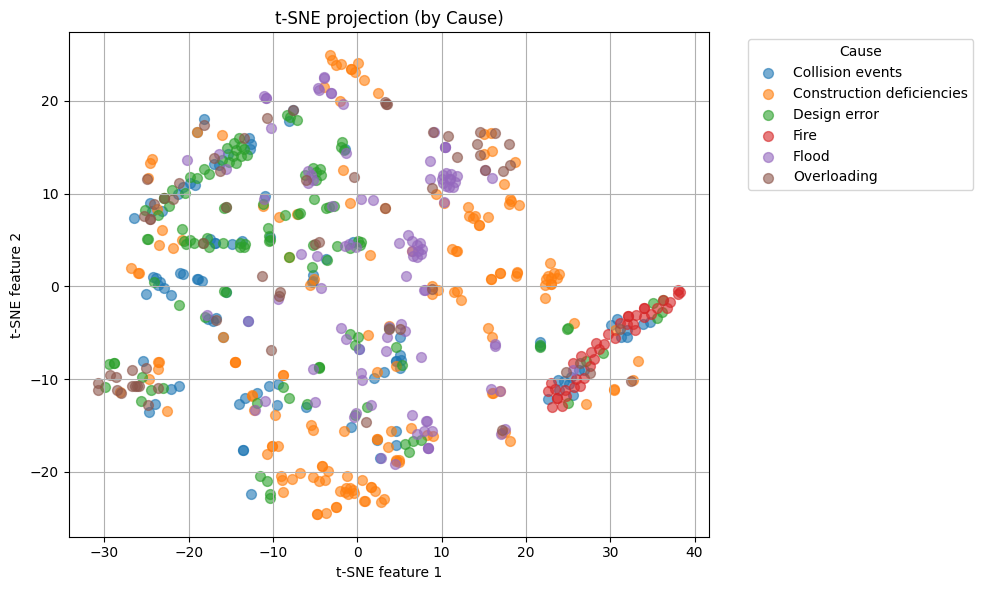

In [169]:
plot_tsne(pipeline,X,Y)

In [154]:
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)

In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_cols=['Type','Material','Collapse','Status','Country','Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('scale', StandardScaler(with_mean=True), num_cols)
    ],
    sparse_threshold=0
)



In [156]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())

])

param_grid={

    'model__n_neighbors': [3,5,7] 
}

In [157]:

grid_search=GridSearchCV(

    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [158]:
grid_search.fit(X_train,y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__n_neighbors': [3, 5, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...), ('scale', ...)]"


In [159]:
print("Best k:", grid_search.best_params_['model__n_neighbors'])
print("Best cross-validated F1 (macro):", grid_search.best_score_)


Best k: 5
Best cross-validated F1 (macro): 0.48326697065176993


In [160]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=grid_search.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  1  5  1  2  0]
 [ 6 20  4  2  1  1]
 [ 6  1 16  1  0  0]
 [ 3  0  0  5  0  0]
 [ 3  1  9  1  6  1]
 [ 2  1  7  0  2  1]]
                           precision    recall  f1-score   support

         Collision events       0.33      0.53      0.41        19
Construction deficiencies       0.83      0.59      0.69        34
             Design error       0.39      0.67      0.49        24
                     Fire       0.50      0.62      0.56         8
                    Flood       0.55      0.29      0.38        21
              Overloading       0.33      0.08      0.12        13

                 accuracy                           0.49       119
                macro avg       0.49      0.46      0.44       119
             weighted avg       0.54      0.49      0.48       119



## RANDOMFOREST

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())

])

param_grid={

    'model__n_neighbors': [3,5,7] 
}

In [162]:

grid_search=GridSearchCV(

    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [163]:
grid_search.fit(X_train,y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'model__n_neighbors': [3, 5, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehot', ...), ('scale', ...)]"


In [164]:

y_pred=grid_search.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  1  5  1  2  0]
 [ 6 20  4  2  1  1]
 [ 6  1 16  1  0  0]
 [ 3  0  0  5  0  0]
 [ 3  1  9  1  6  1]
 [ 2  1  7  0  2  1]]
                           precision    recall  f1-score   support

         Collision events       0.33      0.53      0.41        19
Construction deficiencies       0.83      0.59      0.69        34
             Design error       0.39      0.67      0.49        24
                     Fire       0.50      0.62      0.56         8
                    Flood       0.55      0.29      0.38        21
              Overloading       0.33      0.08      0.12        13

                 accuracy                           0.49       119
                macro avg       0.49      0.46      0.44       119
             weighted avg       0.54      0.49      0.48       119

